## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

In [1]:
#https://foursquare.com/oauth2/access_token?client_id=KHVA2JT2I4GLTWBXSXOT0Y5M50SQAZ4N4RAZBUR2XDWBGSZQ&client_secret=EBJC51YRH0IA4AOB2HSB1LQ2DQRGDYNNAI21TT3AMZOMU0CI&grant_type=authorization_code&redirect_uri=https://www.google.com&code=IZY1YHIYL0G1LXFCM4IFAH5DTK3PYKYVTMSBVWTQ1XL3HM54#_=_
CLIENT_ID = 'KHVA2JT2I4GLTWBXSXOT0Y5M50SQAZ4N4RAZBUR2XDWBGSZQ' # your Foursquare ID
CLIENT_SECRET = 'EBJC51YRH0IA4AOB2HSB1LQ2DQRGDYNNAI21TT3AMZOMU0CI' # your Foursquare Secret
ACCESS_TOKEN = '1KDEBSRN22TGVXPMHSOOEH2LGAG0HW0DODNOO2CEMSNZLP3H' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 60
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
!pip install bs4
from bs4 import BeautifulSoup
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
from bs4 import BeautifulSoup

!pip install geopy
import random # library for random number generation
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes

import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs


import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

print('Libraries imported.')
print('Libraries imported.')

Your credentails:
CLIENT_ID: KHVA2JT2I4GLTWBXSXOT0Y5M50SQAZ4N4RAZBUR2XDWBGSZQ
CLIENT_SECRET:EBJC51YRH0IA4AOB2HSB1LQ2DQRGDYNNAI21TT3AMZOMU0CI
     |████████████████████████████████| 122kB 13.8MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4
     |████████████████████████████████| 112kB 13.6MB/s eta 0:00:01
Folium installed
Libraries imported.
Libraries imported.
Libraries imported.
Libraries imported.


# data

Based on definition of our problem, factors that will influence our decission are:

* number of venues in the neighborhood
* location of neighborhood 
* police respondes in neighborhood

We decided to use known neighborhood locations to define our neighborhoods.

Following data sources will be needed to extract/generate the required information:

* neighborhood names will be obtained from **wiki**
* number of venues and their type and location in every neighborhood will be obtained using **Foursquare API**
* Police data from **denvergov.org** will be transformed into a dataframe containing Type of activity, and location

### Neighborhood Candidates
* I used **Geopoly** to obtain Latitude, Longitude of Denver


In [5]:
address = 'Denver,Colorado,USA'

geolocator = Nominatim(user_agent="Denver_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Denver are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Denver are 39.7392364, -104.9848623.


* I used **Web Scraping** to obtain the csv file with neighborhood names from **denvergov.org** I then Clean the data to obtain only information valid in our report. 


In [3]:
import pandas as pd

df1 = pd.read_csv('statistical_neighborhoods.csv')
df=df1
df["ndh"]=', Denver, Co'
df['ndh2']=(df['NBHD_NAME']+df["ndh"])
df['NEIGHBORHOOD']=df['ndh2']
df.drop(['TYPOLOGY','NOTES','ndh','ndh2'], axis='columns', inplace=True)
df=df.set_index('NBHD_NAME')
df.head()

,NBHD_ID,NEIGHBORHOOD
NBHD_NAME,,
Auraria,2,"Auraria, Denver, Co"
Cory - Merrill,21,"Cory - Merrill, Denver, Co"
Belcaro,7,"Belcaro, Denver, Co"
Washington Park,70,"Washington Park, Denver, Co"
Washington Park West,71,"Washington Park West, Denver, Co"


Scraping and adding Longitude and Latitude, using the **apply** method and save it using **pickle**


In [6]:
df['locationss']= df['NEIGHBORHOOD'].apply(geolocator.geocode)
df['city_coord'] = df['locationss'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))

KeyboardInterrupt: 

In [7]:
lon,lat= zip(*df['city_coord'])
df['latitude']=lon
df['Longitude']=lat
##df.to_pickle('raw_Denver_neighborhood_w_cords.csv')

df.head(3)

KeyError: 'city_coord'

In [8]:
df=pd.read_pickle('raw_Denver_neighborhood_w_cords.csv')
df.head(3)

,NEIGHBORHOOD,locationss,latitude,Longitude,city_coord
NBHD_NAME,,,,,
Auraria,"Auraria, Denver, Co","(Auraria, Denver, Denver County, Colorado, 802...",39.746522,-105.006710,"(39.7465219, -105.0067102)"
Cory - Merrill,"Cory - Merrill, Denver, Co",None,44.933143,7.540121,"(44.933143, 7.540121)"
Belcaro,"Belcaro, Denver, Co","(East Belcaro Drive, Denver, Denver County, Co...",39.702314,-104.947240,"(39.7023138, -104.9472404)"


* I again used **Geopoly** to obtain Latitude, Longitude of neighborhood center

Resulting in the following dataframe and map

In [9]:

#df.drop(['city_coord','locationss'], axis='columns', inplace=True)
dendata=df
dendata=dendata.reset_index()
dendata=dendata.sort_values(by=['Longitude'])
dendata=dendata[28:66]
dendata.head(3)

,NBHD_NAME,NEIGHBORHOOD,locationss,latitude,Longitude,city_coord
49,Union Station,"Union Station, Denver, Co","(Union Station, 1701, Wynkoop Street, 16th Str...",39.753630,-105.000748,"(39.75363, -105.0007481)"
64,Windsor,"Windsor, Denver, Co","(The Windsor, 1777, Larimer Street, Central Bu...",39.750865,-104.995794,"(39.75086545, -104.99579430063064)"
33,Overland,"Overland, Denver, Co","(Overland Lake, Denver, Denver County, Colorad...",39.690508,-104.995185,"(39.6905077, -104.99518474141124)"


In [145]:
latmap=dendata.latitude.mean()
lonmap=dendata.Longitude.mean()

### Crime data
* I used **Web Scraping** to obtain crime data from **denvergov.org**
* I again used **pandas** to group frequency of **Police Encounters** by neighborhood

Resulting in the following dataframe, map and graph


**Notice the circle opacity(darkness), the darker the circle the more Police encounters**

In [146]:
#url = 'https://www.denvergov.org/media/gis/DataCatalog/crime/csv/crime.csv
#dd=pd.read_csv('denver scraping.csv')
dcd = pd.read_pickle('123.csv') #dcd = Denver Crime Data
dcd.drop(['latitude', 'longitude', 'color'], axis='columns', inplace=True)
dd=dendata
dd=dd.set_index('NBHD_NAME')
result = pd.concat([dcd,dd],axis=1)
#result.to_pickle('Denver_venue_w_crime.csv')    #to save the dataframe, df to 123.pkl
graph=result
result.head()

,OFFENSE_CODE,NEIGHBORHOOD,locationss,latitude,Longitude,city_coord
Rosedale,1099.0,"Rosedale, Denver, Co","(Rosedale, Denver, Denver County, Colorado, Un...",39.671901,-104.980499,"(39.6719007, -104.98049875528524)"
Skyland,1291.0,"Skyland, Denver, Co","(Skyland, Denver, Denver County, Colorado, Uni...",39.755713,-104.950224,"(39.75571325, -104.95022361494938)"
Belcaro,1460.0,"Belcaro, Denver, Co","(East Belcaro Drive, Denver, Denver County, Co...",39.702314,-104.947240,"(39.7023138, -104.9472404)"
Southmoor Park,1725.0,"Southmoor Park, Denver, Co","(Southmoor Park, Denver, Denver County, Colora...",39.651121,-104.907154,"(39.65112095, -104.90715363615266)"
Washington Park,1736.0,"Washington Park, Denver, Co","(Washington Park, Denver, Denver County, Color...",39.702081,-104.971034,"(39.7020811, -104.971033692151)"


Plot data to map

In [147]:
Denver_mergedw=result.dropna()
Denver_mergedw=Denver_mergedw.reset_index()

Denver_mergedw=Denver_mergedw.rename(columns={"index": "NBHD_NAME"}, errors="raise")


In [148]:

df_o32 = df_o
df_o32 = df_o32.sort_values(by=['Venue Count'])
df_o32= df_o32[10:]
df_o32=df_o32.rename(columns={"index": "NBHD_NAME"}, errors="raise")

df_o32


#df.drop(['city_coord','locationss'], axis='columns', inplace=True)


NameError: name 'df_o' is not defined

In [ ]:
fish_frame

In [76]:
print(graph_c_out.shape,(df_o.shape))

NameError: name 'graph_c_out' is not defined

In [ ]:
graph_c_out2

In [154]:
counts


,Venue Category
Neighborhood,
North Park Hill,25
Montbello,27
Elyria Swansea,36
Goldsmith,39
Hampden,40
Hilltop,42
Clayton,44
East Colfax,51
Kennedy,54


In [24]:

#Denver_mergedw['OFFENSE_CODE']=Denver_mergedw.astype({'OFFENSE_CODE': 'int32'}).dtypes
map_crime = folium.Map(location=[latmap, lonmap], zoom_start=10.5)

for lat, lon, poi, cluster in zip(Denver_mergedw['latitude'], Denver_mergedw['Longitude'], Denver_mergedw['NEIGHBORHOOD'], Denver_mergedw['Venue Count']):  
    label = folium.Popup(str(poi), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color='red',
        fill=True,
        fill_color='blue',
        fill_opacity=((cluster)),
        parse_html=False).add_to(map_crime)


map_crime


KeyError: 'Venue Count'

In [25]:

Denver_mergedw



,NBHD_NAME,OFFENSE_CODE,NEIGHBORHOOD,locationss,latitude,Longitude,city_coord
0,Rosedale,1099.0,"Rosedale, Denver, Co","(Rosedale, Denver, Denver County, Colorado, Un...",39.671901,-104.980499,"(39.6719007, -104.98049875528524)"
1,Skyland,1291.0,"Skyland, Denver, Co","(Skyland, Denver, Denver County, Colorado, Uni...",39.755713,-104.950224,"(39.75571325, -104.95022361494938)"
2,Belcaro,1460.0,"Belcaro, Denver, Co","(East Belcaro Drive, Denver, Denver County, Co...",39.702314,-104.947240,"(39.7023138, -104.9472404)"
3,Southmoor Park,1725.0,"Southmoor Park, Denver, Co","(Southmoor Park, Denver, Denver County, Colora...",39.651121,-104.907154,"(39.65112095, -104.90715363615266)"
4,Washington Park,1736.0,"Washington Park, Denver, Co","(Washington Park, Denver, Denver County, Color...",39.702081,-104.971034,"(39.7020811, -104.971033692151)"
5,Hilltop,1747.0,"Hilltop, Denver, Co","(Hilltop, 4770, Fox Street, Globeville, Denver...",39.783079,-104.993961,"(39.78307865, -104.99396107499159)"
6,City Park,1816.0,"City Park, Denver, Co","(City Park, Denver, Denver County, Colorado, U...",39.747340,-104.950285,"(39.74734, -104.95028497370055)"
7,Kennedy,2000.0,"Kennedy, Denver, Co","(Kennedy Station, Denver, Denver County, Color...",39.659860,-104.859258,"(39.6598602, -104.85925829243594)"
8,Platt Park,2207.0,"Platt Park, Denver, Co","(Platt Park, Denver, Denver County, Colorado, ...",39.686780,-104.980501,"(39.686779900000005, -104.98050124348028)"
9,Whittier,2306.0,"Whittier, Denver, Co","(Whittier, Denver, Denver County, Colorado, 80...",39.756363,-104.966558,"(39.756363, -104.96655839937627)"


In [26]:
df_od=df_o
df_od=df_od.reset_index()

NameError: name 'df_o' is not defined

In [175]:

#Denver_mergedw['OFFENSE_CODE']=Denver_mergedw.astype({'OFFENSE_CODE': 'int32'}).dtypes
map_crime = folium.Map(location=[latmap, lonmap], zoom_start=10.5)

for lat, lon, poi, cluster in zip(Denver_mergedw['latitude'], Denver_mergedw['Longitude'], Denver_mergedw['NEIGHBORHOOD'], Denver_mergedw['Venue Count']):
    label = folium.Popup(str(poi), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color='red',
        fill=True,
        fill_color='blue',
        fill_opacity=1,
        parse_html=False).add_to(map_crime)  
       
map_crime


KeyError: 'Venue Count'

In [149]:

#Denver_mergedw['OFFENSE_CODE']=Denver_mergedw.astype({'OFFENSE_CODE': 'int32'}).dtypes
map_crimedf_o3 = folium.Map(location=[latmap, lonmap], zoom_start=10.5)

for lat, lon, poi, cluster in zip(df_o32['latitude'], df_o32['Longitude'], df_o32['NBHD_NAME'], df_o32['OFFENSE_CODE']):
    label = folium.Popup(str(poi), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color='red',
        fill=True,
        fill_color='blue',
        fill_opacity=cluster/21865.0,
        parse_html=False).add_to(map_crimedf_o3)  
       
map_crimedf_o3

NameError: name 'df_o32' is not defined

In [150]:
Denver_mergedw.head(2)


,NBHD_NAME,OFFENSE_CODE,NEIGHBORHOOD,locationss,latitude,Longitude,city_coord
0,Rosedale,1099.0,"Rosedale, Denver, Co","(Rosedale, Denver, Denver County, Colorado, Un...",39.671901,-104.980499,"(39.6719007, -104.98049875528524)"
1,Skyland,1291.0,"Skyland, Denver, Co","(Skyland, Denver, Denver County, Colorado, Uni...",39.755713,-104.950224,"(39.75571325, -104.95022361494938)"


Plot Police Encounters(OFFENCE_CODE)

In [29]:
#graph=result
graph.drop(['latitude','Longitude','NEIGHBORHOOD'], axis='columns', inplace=True)
graph.drop(['Union Station','Wellshire','CBD'], axis='rows', inplace=True)
#plt.figure();



In [ ]:
graph

<AxesSubplot:>

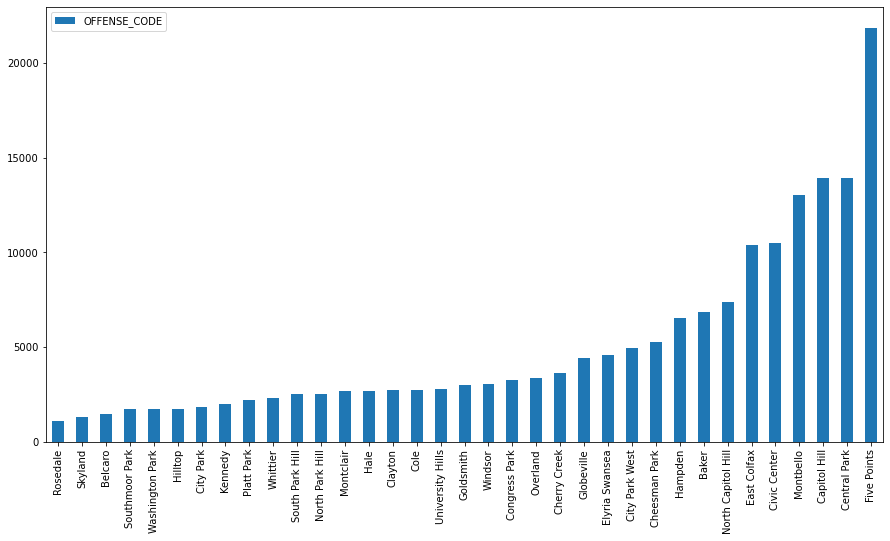

In [30]:
graph.plot.bar(figsize=(15,8))#(colormap="Greens");


In [ ]:
graph


In [31]:
df_o3 = df_o
df_o3 = df_o3.sort_values(by=['Venue Count'])
df_o3= df_o3[10:]

graph_c_out=graph
lon,lat= zip(*graph_c_out['city_coord'])
graph_c_out['latitude']=lon
graph_c_out['Longitude']=lat

NameError: name 'df_o' is not defined

In [ ]:
graph_c_out

### Four Square

Now that we have our Neighboorhood and Encounter data, let's use Foursquare API to get number of venues in each neighborhood.We will also get top venues in each neighborhood for later


In [29]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [32]:
#dendata=dendata.set_index('NBHD_NAME')

dendata.drop(['Union Station','Wellshire','CBD'], axis='rows', inplace=True)

dendata

KeyError: "['Union Station' 'Wellshire' 'CBD'] not found in axis"

In [29]:
df_o3

NameError: name 'df_o3' is not defined

In [ ]:
#Denver_venues = getNearbyVenues(names=dendata['NBHD_NAME'],
#                                  latitudes=dendata['latitude'],
#                                   longitudes=dendata['Longitude'])

In [184]:
#Denver_venues.to_pickle('Denver_foursquare_raw.csv')
Denver_venues= pd.read_pickle('Denver_foursquare_raw.csv')
counts=Denver_venues.groupby('Neighborhood').count()


print('There are {} uniques categories.'.format(len(Denver_venues['Venue Category'].unique())),Denver_venues.shape)
Denver_venues.head(5)

There are 241 uniques categories. (2096, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Union Station,39.75363,-105.000748,Whole Foods Market,39.754436,-105.001675,Grocery Store
1,Union Station,39.75363,-105.000748,Tattered Cover Bookstore,39.751705,-105.000899,Bookstore
2,Union Station,39.75363,-105.000748,The Cooper Lounge,39.753056,-105.000024,Lounge
3,Union Station,39.75363,-105.000748,Denver Union Station,39.753264,-105.000213,Train Station
4,Union Station,39.75363,-105.000748,Hopdoddy Burger Bar Denver,39.753689,-104.999133,Burger Joint


In [233]:
type(Denver_venues)

pandas.core.frame.DataFrame

How many **venues** within **1500 meters** from each neighborhood center **(maximum 60)**

In [34]:
counts.Venue.values


array([60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 44, 60, 60, 51, 36, 60, 60,
       39, 60, 40, 42, 54, 27, 60, 60, 25, 60, 60, 60, 60, 60, 58, 60, 60,
       60, 60, 60, 60])

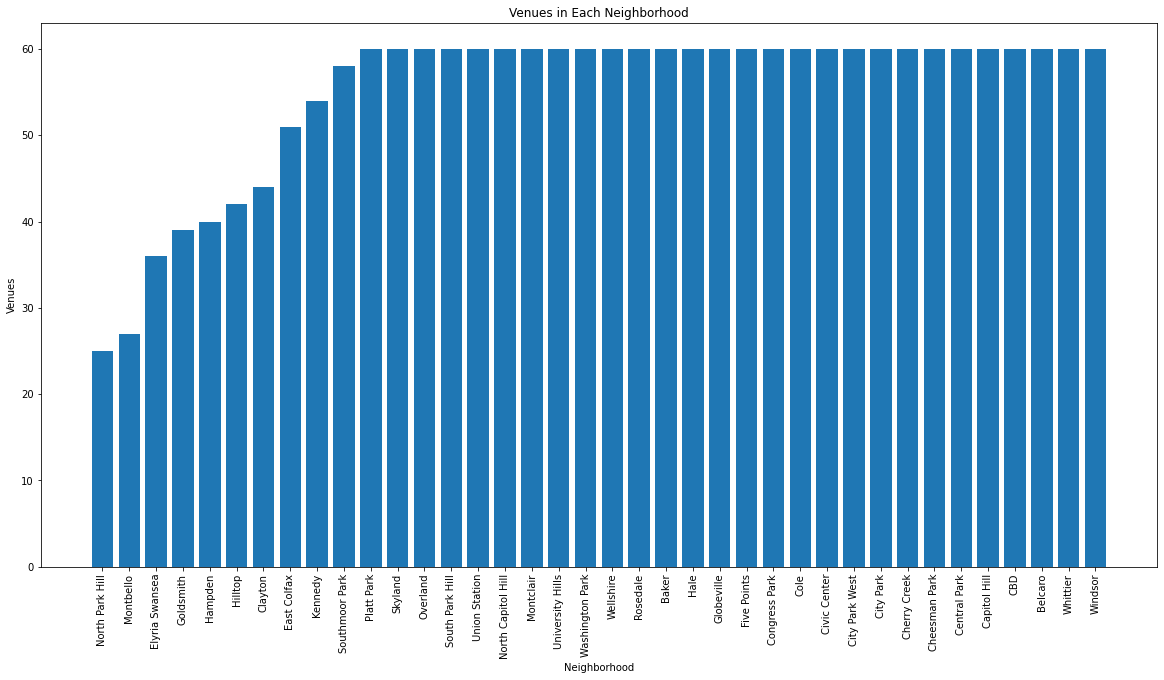

In [35]:
counts=counts.sort_values(by=['Venue'])
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.bar(counts.index.values, counts['Venue'])
plt.xticks(rotation = 90)
plt.title('Venues in Each Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Venues')
plt.show()

We can use **onehot** to break down every venue type and then show top 10 venue categories in each Neighborhood

In [36]:
# one hot encoding
Denver_onehot = pd.get_dummies(Denver_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Denver_onehot['Neighborhood'] = Denver_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Denver_onehot.columns[-1]] + list(Denver_onehot.columns[:-1])
Denver_onehot = Denver_onehot[fixed_columns]

Denver_grouped = Denver_onehot.groupby('Neighborhood').mean().reset_index()
print(Denver_onehot.shape)
Denver_grouped.head(1)

(2096, 241)


,Neighborhood,Zoo Exhibit,ATM,Adult Education Center,Alternative Healer,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bike Shop,Bistro,Board Shop,Bookstore,Botanical Garden,Bowling Alley,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Chinese Restaurant,Chiropractor,Churrascaria,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Exhibit,Fabric Shop,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Karaoke Bar,Korean Restaurant,Laser Tag,Lingerie Store,Liquor Store,Lounge,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Military Base,Miscellaneous Shop,Mobile Phone Shop,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Museum,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Paintball Field,Paper / Office Supplies Store,Park,Pet Service,Pet Store,Pharmacy,Pizza Place,Planetarium,Playground,Plaza,Poke Place,Pool,Print Shop,Pub,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Restaurant,Rock Club,Roof Deck,Rugby Pitch,Salad Place,Salon / Barbershop,Sandwich Place,Science Museum,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Ski Shop,Smoke Shop,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,State / Provincial Park,Steakhouse,Storage Facility,Street Food Gathering,Supermarket,Supplement Shop,Sushi Restaurant,Synagogue,Taco Place,Tapas Restaurant,Tattoo Parlor,Tea Room,Tech Startup,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Track,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yoga Studio,Zoo
0,Baker,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.033333,0.0,0.016667,0.016667,0.0,0.0,0.0,0.0,0.0,0.0,0.083333,0.0,0.0,0.016667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.016667,0.0,0.0,0.0,0.0,0.033333,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.016667,0.0,0.016667,0.0,0.0,0.0,0.033333,0.0,0.033333,0.0,0.0,0.0,0.0,0.016667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.016667,0.016667,0.0,0.0,0.016667,0.016667,0.0,0.0,0.016667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.016667,0.0,0.016

In [37]:
num_top_venues = 5

for hood in Denver_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Denver_grouped[Denver_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    temp_freq=temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues)
    #print(temp_freq[0:3][0:3])
    #print('\n')

----Baker----
----Belcaro----
----CBD----
----Capitol Hill----
----Central Park----
----Cheesman Park----
----Cherry Creek----
----City Park----
----City Park West----
----Civic Center----
----Clayton----
----Cole----
----Congress Park----
----East Colfax----
----Elyria Swansea----
----Five Points----
----Globeville----
----Goldsmith----
----Hale----
----Hampden----
----Hilltop----
----Kennedy----
----Montbello----
----Montclair----
----North Capitol Hill----
----North Park Hill----
----Overland----
----Platt Park----
----Rosedale----
----Skyland----
----South Park Hill----
----Southmoor Park----
----Union Station----
----University Hills----
----Washington Park----
----Wellshire----
----Whittier----
----Windsor----


In [38]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [39]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Denver_grouped['Neighborhood']

for ind in np.arange(Denver_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Denver_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(3)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Baker,Bar,Marijuana Dispensary,American Restaurant,Mexican Restaurant,Breakfast Spot,Art Gallery,Salon / Barbershop,Clothing Store,Thrift / Vintage Store,Coffee Shop
1,Belcaro,Coffee Shop,American Restaurant,Sandwich Place,Ice Cream Shop,Bookstore,Italian Restaurant,Marijuana Dispensary,Fast Food Restaurant,Mexican Restaurant,Gym / Fitness Center
2,CBD,Brewery,Bar,Coffee Shop,New American Restaurant,Beer Garden,Seafood Restaurant,BBQ Joint,Burger Joint,Gastropub,Marijuana Dispensary


In [40]:
counts2=counts
counts2=counts2.drop(['Neighborhood Latitude','Neighborhood Longitude','Venue','Venue Latitude','Venue Longitude'], axis='columns', inplace=True)



In [41]:
#df.head(3)


In [42]:
counts2=counts
counts2=counts2.rename(columns={"Venue Category": "Venue Count"}, errors="raise")


## 2. Using _k_-means for Neighborhoods


In [43]:
counts2.head(2)

,Venue Count
Neighborhood,
North Park Hill,25
Montbello,27


In [44]:
hood_df=pd.concat([result,counts2,dd],axis=1)
hood_df.head()

,OFFENSE_CODE,NEIGHBORHOOD,locationss,latitude,Longitude,city_coord,Venue Count,NEIGHBORHOOD,locationss,latitude,Longitude,city_coord
Rosedale,1099.0,"Rosedale, Denver, Co","(Rosedale, Denver, Denver County, Colorado, Un...",39.671901,-104.980499,"(39.6719007, -104.98049875528524)",60,"Rosedale, Denver, Co","(Rosedale, Denver, Denver County, Colorado, Un...",39.671901,-104.980499,"(39.6719007, -104.98049875528524)"
Skyland,1291.0,"Skyland, Denver, Co","(Skyland, Denver, Denver County, Colorado, Uni...",39.755713,-104.950224,"(39.75571325, -104.95022361494938)",60,"Skyland, Denver, Co","(Skyland, Denver, Denver County, Colorado, Uni...",39.755713,-104.950224,"(39.75571325, -104.95022361494938)"
Belcaro,1460.0,"Belcaro, Denver, Co","(East Belcaro Drive, Denver, Denver County, Co...",39.702314,-104.947240,"(39.7023138, -104.9472404)",60,"Belcaro, Denver, Co","(East Belcaro Drive, Denver, Denver County, Co...",39.702314,-104.947240,"(39.7023138, -104.9472404)"
Southmoor Park,1725.0,"Southmoor Park, Denver, Co","(Southmoor Park, Denver, Denver County, Colora...",39.651121,-104.907154,"(39.65112095, -104.90715363615266)",58,"Southmoor Park, Denver, Co","(Southmoor Park, Denver, Denver County, Colora...",39.651121,-104.907154,"(39.65112095, -104.90715363615266)"
Washington Park,1736.0,"Washington Park, Denver, Co","(Washington Park, Denver, Denver County, Color...",39.702081,-104.971034,"(39.7020811, -104.971033692151)",60,"Washington Park, Denver, Co","(Washington Park, Denver, Denver County, Color...",39.702081,-104.971034,"(39.7020811, -104.971033692151)"


In [45]:
hood_df2=hood_df
hood_df2=hood_df2.reset_index()



In [46]:


print(hood_df2.shape,hood_df2.head())

(38, 13)              index  OFFENSE_CODE                 NEIGHBORHOOD  \
0         Rosedale        1099.0         Rosedale, Denver, Co   
1          Skyland        1291.0          Skyland, Denver, Co   
2          Belcaro        1460.0          Belcaro, Denver, Co   
3   Southmoor Park        1725.0   Southmoor Park, Denver, Co   
4  Washington Park        1736.0  Washington Park, Denver, Co   

                                          locationss   latitude   Longitude  \
0  (Rosedale, Denver, Denver County, Colorado, Un...  39.671901 -104.980499   
1  (Skyland, Denver, Denver County, Colorado, Uni...  39.755713 -104.950224   
2  (East Belcaro Drive, Denver, Denver County, Co...  39.702314 -104.947240   
3  (Southmoor Park, Denver, Denver County, Colora...  39.651121 -104.907154   
4  (Washington Park, Denver, Denver County, Color...  39.702081 -104.971034   

                           city_coord  Venue Count  \
0   (39.6719007, -104.98049875528524)           60   
1  (39.75571325, 

In [47]:
hood_df2=hood_df2.set_index('NEIGHBORHOOD')


In [164]:
df_o =hood_df2.dropna()
df_o.drop(['locationss','city_coord','locationss'], axis='columns', inplace=True)
print( df_o['OFFENSE_CODE'].values ,df_o.columns ,df_o.shape)

[ 1099.  1291.  1460.  1725.  1736.  1747.  1816.  2000.  2207.  2306.
  2515.  2523.  2675.  2694.  2733.  2750.  2789.  3007.  3067.  3266.
  3379.  3648.  4434.  4554.  4944.  5244.  6523.  6856.  7386. 10368.
 10495. 13016. 13906. 13938. 21865.] Index(['index', 'OFFENSE_CODE', 'latitude', 'Longitude', 'Venue Count',
       'latitude', 'Longitude'],
      dtype='object') (35, 7)


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


We then filter out data without alot of venues(60), and neighborhoods in 75th percentile of crimes 

In [49]:
df_quart=df_o.OFFENSE_CODE.quantile([0.75])
df_quart


0.75    5883.5
Name: OFFENSE_CODE, dtype: float64

In [50]:
#df_o2.drop((['Venue Count'] >= 60), axis='rows', inplace=True)dddddd

In [139]:

df_o3 = df_o
df_o3 = df_o3.sort_values(by=['Venue Count'])
df_o3= df_o3[10:]

df_o3 = df_o3.sort_values(by=['OFFENSE_CODE'])
df_o3=df_o3.reset_index()
df_o3= df_o3[:19]
df_o3.drop(['Venue Count'], axis='columns', inplace=True)

df_o3

NameError: name 'df_o' is not defined

In [187]:
df_o3.drop(['NEIGHBORHOOD'], axis='columns', inplace=True)

#.rename(columns={'index': "NEIGHBORHOOD"}, errors="raise")

Now let's normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms interpret features with different magnitudes and distributions equally. We use **StandardScaler()** to normalize our dataset.


In [ ]:
from sklearn.preprocessing import StandardScaler

X = final_neighborhoods.values[:,1:4]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset

kmeans final group

In [45]:
from sklearn.preprocessing import StandardScaler

X = final_neighborhoods.values[:,1:4]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.21702935,  1.06158749, -1.46670362],
       [ 0.23868561,  0.36592201, -1.46670362],
       [ 0.17714896,  1.79524282, -1.46670362],
       [ 0.63958386,  1.42819042, -1.46670362],
       [ 1.69623601, -1.19198994, -0.80319484],
       [ 0.60007862, -0.36895462, -0.80319484],
       [ 0.21058828, -0.36403275, -0.80319484],
       [-1.80593096,  0.86360153, -0.13968606],
       [-1.02105487,  1.63767411, -0.13968606],
       [ 0.94071447, -0.36819333,  0.52382272],
       [ 0.92056965,  0.29099092,  0.52382272],
       [ 0.66096574,  0.28851481,  0.52382272],
       [ 1.22802972, -0.36813943,  0.52382272],
       [ 0.77026865, -1.54799745,  0.52382272],
       [-1.10106059, -1.52339891,  1.1873315 ],
       [-1.21663715, -0.93085171,  1.1873315 ],
       [-0.74223936, -0.54879214,  1.1873315 ],
       [-0.73502474,  0.41137747,  1.1873315 ],
       [-1.67795126, -0.9307513 ,  1.1873315 ]])

In [ ]:


latmap=final_neighborhoods.latitude.mean()
lonmap=final_neighborhoods.Longitude.mean()
# create map of toronto using latitude and longitude values
final_neighborhoods_map = folium.Map(location=[latmap, lonmap], zoom_start=12)

final_neighborhoods_map = folium.Map(location=[latmap, lonmap], zoom_start=10.5)
rainbow = [colors.rgb2hex(i) for i in colors_array]


for lat, lon, cluster,crime in zip(final_neighborhoods['latitude'], final_neighborhoods['Longitude'], final_neighborhoods['Labels'],final_neighborhoods['OFFENSE_CODE']):
    label = folium.Popup(str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color='black',
        fill=True,
        fill_color=rainbow[cluster-2],
        fill_opacity=(1),
        parse_html=False).add_to(final_neighborhoods_map)  
       
final_neighborhoods_map

### Modeling


Let's run our model and group our customers into **five** clusters.


In [151]:
num_clusters = 5

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=7)
k_means.fit(cluster_dataset)
labels = k_means.labels_
final_neighborhoods["Labels"] = labels
k_mean_cluster=labels,final_neighborhoods.groupby('Labels').mean()
print(labels,final_neighborhoods.groupby('Labels').mean())

ValueError: Length of values (19) does not match length of index (7)

In [58]:
df_o_cluster_avg=final_neighborhoods.groupby('Labels').mean()

In [138]:
final_neighborhoods

,NEIGHBORHOOD,OFFENSE_CODE,latitude,Longitude,Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,University Hills,2789.0,39.667773,-104.936034,4,Sandwich Place,Bakery,Pharmacy,Arts & Crafts Store,Coffee Shop,Gym / Fitness Center,Cosmetics Shop,Pizza Place,Pet Store,Bank
1,Cherry Creek,3648.0,39.693088,-104.916852,4,Park,Pizza Place,Discount Store,Liquor Store,Coffee Shop,Sushi Restaurant,Mexican Restaurant,Residential Building (Apartment / Condo),Fast Food Restaurant,Salon / Barbershop
2,Overland,3379.0,39.690508,-104.995185,1,Brewery,Coffee Shop,Mexican Restaurant,Bar,Golf Course,Pizza Place,Park,Marijuana Dispensary,Sushi Restaurant,Grocery Store
3,Platt Park,2207.0,39.686780,-104.980501,1,Mexican Restaurant,Coffee Shop,Brewery,Bar,Park,Sushi Restaurant,Pizza Place,Fried Chicken Joint,Tea Room,Bakery
4,Washington Park,1736.0,39.702081,-104.971034,1,American Restaurant,Coffee Shop,Bar,Sandwich Place,Grocery Store,Park,Dive Bar,Liquor Store,Gym,Video Store
5,Belcaro,1460.0,39.702314,-104.947240,1,Coffee Shop,American Restaurant,Sandwich Place,Ice Cream Shop,Bookstore,Italian Restaurant,Marijuana Dispensary,Fast Food Restaurant,Mexican Restaurant,Gym / Fitness Center
6,Rosedale,1099.0,39.671901,-104.980499,1,Coffee Shop,Breakfast Spot,Mexican Restaurant,Brewery,Pizza Place,Fried Chicken Joint,Bakery,Hobby Shop,Burger Joint,Fast Food Restaurant


In [126]:
final_cluster_map

In [59]:
df_o_cluster_avg=df_o_cluster_avg.reset_index()

In [214]:
fish_frame =df_o_cluster_avg.iloc[:, :-1]

In [10]:
#df_o_cluster_avg.to_pickle('df_o_cluster_avg.csv')
df_o_cluster_avg = pd.read_pickle('df_o_cluster_avg.csv')

In [14]:
latmap=df_o_cluster_avg.latitude.mean()
lonmap=df_o_cluster_avg.Longitude.mean()
# create map of toronto using latitude and longitude
colors_array = cm.rainbow(np.linspace(0, 1, 5))
df_o_cluster_avg_map = folium.Map(location=[latmap, lonmap], zoom_start=10.5)
rainbow = [colors.rgb2hex(i) for i in colors_array]


for lat, lon, cluster,crime in zip(df_o_cluster_avg['latitude'], df_o_cluster_avg['Longitude'], df_o_cluster_avg['Labels'],df_o_cluster_avg['OFFENSE_CODE']):
    label = folium.Popup(str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color='black',
        fill=True,
        fill_color=rainbow[cluster-2],
        fill_opacity=(crime-1000)/4000,
        parse_html=False).add_to(df_o_cluster_avg_map)  
       
df_o_cluster_avg_map

In [15]:
#final_cluster.to_pickle('final_cluster.csv')
final_cluster=pd.read_pickle('final_cluster.csv')

In [ ]:
final_neighborhoods= pd.read_pickle('final_neighborhoods.csv')
final_neighborhoods

In [19]:
latmap=final_neighborhoods.latitude.mean()
lonmap=final_neighborhoods.Longitude.mean()
# create map of toronto using latitude and longitude values
final_neighborhoods_map = folium.Map(location=[latmap, lonmap], zoom_start=12)

colors_array = cm.rainbow(np.linspace(0, 1, 5))
rainbow = [colors.rgb2hex(i) for i in colors_array]


folium.CircleMarker(
        [latmap, lonmap],
        radius=10,
        #popup=label,
        color='black',
        fill=True,
        fill_color='black',
        fill_opacity=8,
        parse_html=False).add_to(final_neighborhoods_map)  

for neighborhood, lat, lon, cluster,crimes in zip(final_neighborhoods['NEIGHBORHOOD'], final_neighborhoods['latitude'], final_neighborhoods['Longitude'], final_neighborhoods['Labels'], final_neighborhoods['OFFENSE_CODE']):
    label = '{},{}'.format(cluster,neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=neighborhood,
       
        color='black',
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=(1/crimes)*5000,
        parse_html=False).add_to(final_neighborhoods_map)  

final_neighborhoods_map
# add markers to map


In [20]:
Cluster0=final_neighborhoods.loc[final_neighborhoods['Labels'] == 0]
Cluster0

,NEIGHBORHOOD,OFFENSE_CODE,latitude,Longitude,Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Hale,2694.0,39.733021,-104.931128,0,Coffee Shop,Ice Cream Shop,Ethiopian Restaurant,Bar,Park,Grocery Store,Sandwich Place,Pub,Pizza Place,Burger Joint
1,Congress Park,3266.0,39.733720,-104.948367,0,Coffee Shop,Bar,Ice Cream Shop,Yoga Studio,Pizza Place,Café,Mexican Restaurant,Breakfast Spot,Sushi Restaurant,Italian Restaurant
2,Montclair,2675.0,39.731735,-104.912948,0,Coffee Shop,Sandwich Place,Hardware Store,Convenience Store,Ice Cream Shop,Furniture / Home Store,Mexican Restaurant,Italian Restaurant,Marijuana Dispensary,Chinese Restaurant
3,South Park Hill,2515.0,39.746650,-104.922043,0,Coffee Shop,Grocery Store,Pizza Place,Hardware Store,Marijuana Dispensary,Sandwich Place,Chinese Restaurant,Convenience Store,Discount Store,Ethiopian Restaurant


In [21]:
Cluster1=final_neighborhoods.loc[final_neighborhoods['Labels'] == 1]
Cluster1

,NEIGHBORHOOD,OFFENSE_CODE,latitude,Longitude,Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Globeville,4434.0,39.780732,-104.986972,1,Brewery,Cocktail Bar,Marijuana Dispensary,Bar,Dive Bar,Burger Joint,Diner,Music Venue,Steakhouse,New American Restaurant
5,City Park West,4944.0,39.745376,-104.966577,1,Pizza Place,American Restaurant,Coffee Shop,Ice Cream Shop,Sandwich Place,Bar,Breakfast Spot,Liquor Store,Park,Café
6,Cheesman Park,5244.0,39.732814,-104.966455,1,Pizza Place,American Restaurant,Sandwich Place,Coffee Shop,Ice Cream Shop,Park,Café,Bar,Record Shop,Botanical Garden


In [22]:
Cluster2=final_neighborhoods.loc[final_neighborhoods['Labels'] == 2]
Cluster2

,NEIGHBORHOOD,OFFENSE_CODE,latitude,Longitude,Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,University Hills,2789.0,39.667773,-104.936034,2,Sandwich Place,Bakery,Pharmacy,Arts & Crafts Store,Coffee Shop,Gym / Fitness Center,Cosmetics Shop,Pizza Place,Pet Store,Bank
8,Cherry Creek,3648.0,39.693088,-104.916852,2,Park,Pizza Place,Discount Store,Liquor Store,Coffee Shop,Sushi Restaurant,Mexican Restaurant,Residential Building (Apartment / Condo),Fast Food Restaurant,Salon / Barbershop


In [23]:
Cluster3=final_neighborhoods.loc[final_neighborhoods['Labels'] == 3]
Cluster3

,NEIGHBORHOOD,OFFENSE_CODE,latitude,Longitude,Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Whittier,2306.0,39.756363,-104.966558,3,Brewery,Coffee Shop,Bar,Zoo Exhibit,Café,Pizza Place,Burger Joint,Bagel Shop,Park,Breakfast Spot
12,Skyland,1291.0,39.755713,-104.950224,3,Zoo Exhibit,Science Museum,Convenience Store,Fast Food Restaurant,Pizza Place,Park,Mexican Restaurant,History Museum,American Restaurant,Golf Course
9,City Park,1816.0,39.747340,-104.950285,3,Zoo Exhibit,Bar,Coffee Shop,Greek Restaurant,Park,Breakfast Spot,Brewery,Cosmetics Shop,Ice Cream Shop,Zoo
10,Cole,2750.0,39.765630,-104.966557,3,Brewery,Bar,Coffee Shop,Park,BBQ Joint,Café,Beer Garden,Pizza Place,New American Restaurant,French Restaurant
11,Windsor,3067.0,39.750865,-104.995794,3,Hotel,Mexican Restaurant,American Restaurant,Bar,Italian Restaurant,Cocktail Bar,Pizza Place,Lounge,Beer Garden,Seafood Restaurant


In [24]:
Cluster4=final_neighborhoods.loc[final_neighborhoods['Labels'] == 4]
Cluster4

,NEIGHBORHOOD,OFFENSE_CODE,latitude,Longitude,Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Overland,3379.0,39.690508,-104.995185,4,Brewery,Coffee Shop,Mexican Restaurant,Bar,Golf Course,Pizza Place,Park,Marijuana Dispensary,Sushi Restaurant,Grocery Store
14,Platt Park,2207.0,39.686780,-104.980501,4,Mexican Restaurant,Coffee Shop,Brewery,Bar,Park,Sushi Restaurant,Pizza Place,Fried Chicken Joint,Tea Room,Bakery
15,Washington Park,1736.0,39.702081,-104.971034,4,American Restaurant,Coffee Shop,Bar,Sandwich Place,Grocery Store,Park,Dive Bar,Liquor Store,Gym,Video Store
16,Belcaro,1460.0,39.702314,-104.947240,4,Coffee Shop,American Restaurant,Sandwich Place,Ice Cream Shop,Bookstore,Italian Restaurant,Marijuana Dispensary,Fast Food Restaurant,Mexican Restaurant,Gym / Fitness Center
18,Rosedale,1099.0,39.671901,-104.980499,4,Coffee Shop,Breakfast Spot,Mexican Restaurant,Brewery,Pizza Place,Fried Chicken Joint,Bakery,Hobby Shop,Burger Joint,Fast Food Restaurant


In [25]:
Clusterfinal=final_neighborhoods.loc[(final_neighborhoods['Labels'] == 4)|(final_neighborhoods['Labels'] == 2)]
Clusterfinal

,NEIGHBORHOOD,OFFENSE_CODE,latitude,Longitude,Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,University Hills,2789.0,39.667773,-104.936034,2,Sandwich Place,Bakery,Pharmacy,Arts & Crafts Store,Coffee Shop,Gym / Fitness Center,Cosmetics Shop,Pizza Place,Pet Store,Bank
8,Cherry Creek,3648.0,39.693088,-104.916852,2,Park,Pizza Place,Discount Store,Liquor Store,Coffee Shop,Sushi Restaurant,Mexican Restaurant,Residential Building (Apartment / Condo),Fast Food Restaurant,Salon / Barbershop
17,Overland,3379.0,39.690508,-104.995185,4,Brewery,Coffee Shop,Mexican Restaurant,Bar,Golf Course,Pizza Place,Park,Marijuana Dispensary,Sushi Restaurant,Grocery Store
14,Platt Park,2207.0,39.686780,-104.980501,4,Mexican Restaurant,Coffee Shop,Brewery,Bar,Park,Sushi Restaurant,Pizza Place,Fried Chicken Joint,Tea Room,Bakery
15,Washington Park,1736.0,39.702081,-104.971034,4,American Restaurant,Coffee Shop,Bar,Sandwich Place,Grocery Store,Park,Dive Bar,Liquor Store,Gym,Video Store
16,Belcaro,1460.0,39.702314,-104.947240,4,Coffee Shop,American Restaurant,Sandwich Place,Ice Cream Shop,Bookstore,Italian Restaurant,Marijuana Dispensary,Fast Food Restaurant,Mexican Restaurant,Gym / Fitness Center
18,Rosedale,1099.0,39.671901,-104.980499,4,Coffee Shop,Breakfast Spot,Mexican Restaurant,Brewery,Pizza Place,Fried Chicken Joint,Bakery,Hobby Shop,Burger Joint,Fast Food Restaurant


In [17]:
#final_cluster.to_pickle('final_cluster.csv')
final_cluster=pd.read_pickle('final_cluster.csv')

In [27]:
print(final_cluster.latitude.mean(), final_cluster.Longitude.mean())

39.68777775 -104.96104934059144


In [180]:
latmap=final_cluster.latitude.mean()
lonmap=final_cluster.Longitude.mean()
# create map of toronto using latitude and longitude values
final_cluster_map = folium.Map(location=[latmap, lonmap], zoom_start=12)

colors_array = cm.rainbow(np.linspace(0, 1, 5))
rainbow = [colors.rgb2hex(i) for i in colors_array]


folium.CircleMarker(
        [latmap, lonmap],
        radius=10,
        #popup=label,
        color='black',
        fill=True,
        fill_color='black',
        fill_opacity=8,
        parse_html=False).add_to(final_cluster_map)  

for neighborhood, lat, lon, cluster,crimes in zip(final_cluster['NEIGHBORHOOD'], final_cluster['latitude'], final_cluster['Longitude'], final_cluster['Labels'], final_cluster['OFFENSE_CODE']):
    label = '{},{}'.format(cluster,neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=neighborhood,
       
        color='black',
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=(1/crimes)*5000,
        parse_html=False).add_to(final_cluster_map)  

final_cluster_map


In [31]:
final_cluster_venues= getNearbyVenues(names=final_cluster['NEIGHBORHOOD'],
                                  latitudes=final_cluster['latitude'],
                                   longitudes=final_cluster['Longitude'])

University Hills
Cherry Creek
Overland
Platt Park
Washington Park
Belcaro
Rosedale


In [81]:
#final_cluster_venues.to_pickle('final_cluster_venues.csv')
final_cluster_venues= pd.read_pickle('final_cluster_venues.csv')

In [82]:
final_cluster_venues['Labels']=final_cluster_venues['Neighborhood']

In [83]:
final_cluster_venues.loc[(final_cluster_venues.Labels == 'University Hills'),'Labels']=0
final_cluster_venues.loc[(final_cluster_venues.Labels == 'Cherry Creek'),'Labels']=1
final_cluster_venues.loc[(final_cluster_venues.Labels == 'Overland'),'Labels']=2
final_cluster_venues.loc[(final_cluster_venues.Labels == 'Platt Park'),'Labels']=3
final_cluster_venues.loc[(final_cluster_venues.Labels == 'Washington Park'),'Labels']=4
final_cluster_venues.loc[(final_cluster_venues.Labels == 'Belcaro'),'Labels']=5
final_cluster_venues.loc[(final_cluster_venues.Labels == 'Rosedale'),'Labels']=6


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue Category,Labels
0,University Hills,39.667773,-104.936034,Chipotle Mexican Grill,39.666417,-104.939887,Mexican Restaurant,0
1,University Hills,39.667773,-104.936034,Schlessman Family YMCA,39.668171,-104.941526,Recreation Center,0
2,University Hills,39.667773,-104.936034,Ulta Beauty - Curbside Pickup Only,39.665979,-104.939303,Cosmetics Shop,0
3,University Hills,39.667773,-104.936034,Chez Artiste Theatre,39.665008,-104.938766,Indie Movie Theater,0
4,University Hills,39.667773,-104.936034,Potbelly Sandwich Shop,39.667596,-104.939783,Sandwich Place,0
5,University Hills,39.667773,-104.936034,Sprouts Farmers Market,39.664247,-104.939432,Grocery Store,0
6,University Hills,39.667773,-104.936034,Great Clips,39.667453,-104.937896,Salon / Barbershop,0
7,University Hills,39.667773,-104.936034,Twin Fin Poke,39.667521,-104.939612,Poke Place,0
8,University Hills,39.667773,-104.936034,Papa Murphy's,39.667565,-104.939690,Pizza Place,0
9,University Hills,39.667773,-104.936034,Marshalls,39.667658,-104.938776,Department Store,0


In [58]:
final_cluster_venues=final_cluster_venues.set_index('Neighborhood')

In [33]:
final_cluster_venues.shape

(345, 7)

In [78]:
final_cluster_venues.head(2)  

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue Category,Labels
0,University Hills,39.667773,-104.936034,Chipotle Mexican Grill,39.666417,-104.939887,Mexican Restaurant,University Hills
1,University Hills,39.667773,-104.936034,Schlessman Family YMCA,39.668171,-104.941526,Recreation Center,University Hills


In [60]:
final_cluster_venues.loc[final_cluster_venues['Labels'] == 'University Hills']=0

In [35]:
final_cluster_venues=final_cluster_venues.rename(columns={'Venue Latitude': "Venue_Latitude"}, errors="raise")
final_cluster_venues=final_cluster_venues.rename(columns={'Venue Longitude': "Venue_Longitude"}, errors="raise")

In [85]:
final_cluster_venues['Labels']=final_cluster_venues['Labels'].astype(int)

In [93]:
latmap=final_cluster_venues.Venue_Latitude.mean()
lonmap=final_cluster_venues.Venue_Longitude.mean()
# create map of toronto using latitude and longitude values
final_cluster_venues_map = folium.Map(location=[latmap, lonmap], zoom_start=12)

colors_array = cm.rainbow(np.linspace(0, 1, 5))
rainbow = [colors.rgb2hex(i) for i in colors_array]


folium.CircleMarker(
        [latmap, lonmap],
        radius=10,
        #popup=label,
        color='black',
        fill=True,
        fill_color='black',
        fill_opacity=8,
        parse_html=False).add_to(final_cluster_venues_map)  

for neighborhood, lat, lon, cluster in zip(final_cluster_venues['Neighborhood'], final_cluster_venues['Venue_Latitude'], final_cluster_venues['Venue_Longitude'],final_cluster_venues['Labels']):
    label = '{},{}'.format(cluster,neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=2,
        popup=neighborhood,
       
        color=rainbow[cluster-2],
        fill=True,
        fill_color=rainbow[cluster-2],
        fill_opacity=1,
        parse_html=False).add_to(final_cluster_venues_map)  

final_cluster_venues_map


In [235]:
Denver_venues.head(2)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Union Station,39.75363,-105.000748,Whole Foods Market,39.754436,-105.001675,Grocery Store
1,Union Station,39.75363,-105.000748,Tattered Cover Bookstore,39.751705,-105.000899,Bookstore


In [ ]:
Denver_venues['Neighborhood']

In [246]:
final_cluster_venues=Denver_venues[(Denver_venues['Neighborhood']=='Globeville')|(Denver_venues['Neighborhood']=='City Park West')|(Denver_venues['Neighborhood']=='Cheesman Park')|(Denver_venues['Neighborhood']=='Overland')|(Denver_venues['Neighborhood']=='Platt Park')|(Denver_venues['Neighborhood']=='Washington Park')|(Denver_venues['Neighborhood']=='Belcaro')|(Denver_venues['Neighborhood']=='Rosedale')]

In [249]:
final_cluster_venues.head(5)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
120,Overland,39.690508,-104.995185,Session Coffee,39.692554,-104.992148,Coffee Shop
121,Overland,39.690508,-104.995185,Urban Lights,39.692100,-104.993000,Furniture / Home Store
122,Overland,39.690508,-104.995185,Easton Training Center,39.693072,-104.992084,Martial Arts School
123,Overland,39.690508,-104.995185,Adelitas Cocina Y Cantina,39.693322,-104.987147,Mexican Restaurant
124,Overland,39.690508,-104.995185,Maria Empanada,39.693397,-104.987051,Argentinian Restaurant


In [33]:
dendata2=dendata.reset_index()

In [34]:
dendata2.drop(['NEIGHBORHOOD'], axis='columns', inplace=True)


In [35]:

dendata2=dendata2.rename(columns={'index': "NEIGHBORHOOD"}, errors="raise")

In [36]:
dendata2

,NEIGHBORHOOD,NBHD_NAME,locationss,latitude,Longitude,city_coord
0,49,Union Station,"(Union Station, 1701, Wynkoop Street, 16th Str...",39.753630,-105.000748,"(39.75363, -105.0007481)"
1,64,Windsor,"(The Windsor, 1777, Larimer Street, Central Bu...",39.750865,-104.995794,"(39.75086545, -104.99579430063064)"
2,33,Overland,"(Overland Lake, Denver, Denver County, Colorad...",39.690508,-104.995185,"(39.6905077, -104.99518474141124)"
3,26,Hilltop,"(Hilltop, 4770, Fox Street, Globeville, Denver...",39.783079,-104.993961,"(39.78307865, -104.99396107499159)"
4,69,Baker,"(Baker, Denver, Denver County, Colorado, Unite...",39.711595,-104.993750,"(39.711594500000004, -104.99374985708542)"
5,47,Civic Center,"(Civic Center, Denver, Denver County, Colorado...",39.741357,-104.987141,"(39.7413574, -104.9871407)"
6,61,Globeville,"(Globeville, Denver, Denver County, Colorado, ...",39.780732,-104.986972,"(39.78073155, -104.9869723275022)"
7,46,North Capitol Hill,"(North Capitol Hill, Denver, Denver County, Co...",39.745624,-104.981598,"(39.7456241, -104.98159787979148)"
8,32,Platt Park,"(Platt Park, Denver, Denver County, Colorado, ...",39.686780,-104.980501,"(39.686779900000005, -104.98050124348028)"
9,24,Rosedale,"(Rosedale, Denver, Denver County, Colorado, Un...",39.671901,-104.980499,"(39.6719007, -104.98049875528524)"


In [126]:
df_o3.head(1)

,NEIGHBORHOOD,OFFENSE_CODE,latitude,Longitude,latitude,Longitude,Labels
0,Rosedale,1099.0,39.671901,-104.980499,39.671901,-104.980499,2


In [130]:

#Denver_mergedw['OFFENSE_CODE']=Denver_mergedw.astype({'OFFENSE_CODE': 'int32'}).dtypes
df_o3 = folium.Map(location=[latmap, lonmap], zoom_start=10.5)

for lat, lon, poi, cluster,crime in zip(df_o3['latitude'], df_o3['Longitude'], df_o3['NEIGHBORHOOD'], df_o3['Labels'],df_o3['OFFENSE_CODE']):
    label = folium.Popup(str(poi), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color='red',
        fill=True,
        fill_color='blue',
        fill_opacity=(crime-1000)/4000,
        parse_html=False).add_to(map_final_neighborhoods)  
       
map_final_neighborhoods

TypeError: 'Map' object is not subscriptable

In [186]:

# create map of toronto using latitude and longitude values
map_denver = folium.Map(location=[latmap, lonmap], zoom_start=10.5)

folium.CircleMarker(
        [latmap, lonmap],
        radius=10,
        popup=label,
        color='black',
        fill=True,
        fill_color='red',
        fill_opacity=.7,
        parse_html=False).add_to(map_denver)  

for neighborhood, lat, lng, in zip(dendata2['NEIGHBORHOOD'], dendata2['latitude'], dendata2['Longitude']):
    label = '{},{},{}'.format(neighborhood,lat,lng)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=8,
        popup=label,
        color='blue',
        fill=True,
        fill_color='black',
        fill_opacity=0.5,
        parse_html=False). add_to(map_denver)  

    
    
map_denver
# add markers to map



In [4]:

# create map of toronto using latitude and longitude values
map_k = folium.Map(location=[latmap, lonmap], zoom_start=12)


colors_array = cm.rainbow(np.linspace(0, 1, 5))
rainbow = [colors.rgb2hex(i) for i in colors_array]


folium.CircleMarker(
        [latmap, lonmap],
        radius=10,
        #popup=label,
        color='black',
        fill=True,
        fill_color='red',
        fill_opacity=8,
        parse_html=False).add_to(map_k)  

for neighborhood, lat, lon, cluster,crimes in zip(dendata2['NEIGHBORHOOD'], dendata2['latitude'], dendata2['Longitude'], dendata2['Labels'], dendata2['OFFENSE_CODE']):
    label = '{},{}'.format(cluster,neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=neighborhood,
       
        color='black',
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=(1/crimes)*5000,
        parse_html=False).add_to(map_k)  

map_k
# add markers to map



NameError: name 'latmap' is not defined

In [39]:
dendata2['Labels']=

,NEIGHBORHOOD,NBHD_NAME,locationss,latitude,Longitude,city_coord
0,49,Union Station,"(Union Station, 1701, Wynkoop Street, 16th Str...",39.753630,-105.000748,"(39.75363, -105.0007481)"
1,64,Windsor,"(The Windsor, 1777, Larimer Street, Central Bu...",39.750865,-104.995794,"(39.75086545, -104.99579430063064)"
2,33,Overland,"(Overland Lake, Denver, Denver County, Colorad...",39.690508,-104.995185,"(39.6905077, -104.99518474141124)"
3,26,Hilltop,"(Hilltop, 4770, Fox Street, Globeville, Denver...",39.783079,-104.993961,"(39.78307865, -104.99396107499159)"
4,69,Baker,"(Baker, Denver, Denver County, Colorado, Unite...",39.711595,-104.993750,"(39.711594500000004, -104.99374985708542)"
5,47,Civic Center,"(Civic Center, Denver, Denver County, Colorado...",39.741357,-104.987141,"(39.7413574, -104.9871407)"
6,61,Globeville,"(Globeville, Denver, Denver County, Colorado, ...",39.780732,-104.986972,"(39.78073155, -104.9869723275022)"
7,46,North Capitol Hill,"(North Capitol Hill, Denver, Denver County, Co...",39.745624,-104.981598,"(39.7456241, -104.98159787979148)"
8,32,Platt Park,"(Platt Park, Denver, Denver County, Colorado, ...",39.686780,-104.980501,"(39.686779900000005, -104.98050124348028)"
9,24,Rosedale,"(Rosedale, Denver, Denver County, Colorado, Un...",39.671901,-104.980499,"(39.6719007, -104.98049875528524)"


Lets save this final data And merge in the Most common venues within the final neighbor hoods

In [38]:
final_neighborhoods=dendata2.sort_values(by=['Labels'])

KeyError: 'Labels'

In [43]:
final_neighborhoods

,OFFENSE_CODE,latitude,Longitude,Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Hale,2694.0,39.733021,-104.931128,0.0,Coffee Shop,Ice Cream Shop,Ethiopian Restaurant,Bar,Park,Grocery Store,Sandwich Place,Pub,Pizza Place,Burger Joint
Congress Park,3266.0,39.733720,-104.948367,0.0,Coffee Shop,Bar,Ice Cream Shop,Yoga Studio,Pizza Place,Café,Mexican Restaurant,Breakfast Spot,Sushi Restaurant,Italian Restaurant
Montclair,2675.0,39.731735,-104.912948,0.0,Coffee Shop,Sandwich Place,Hardware Store,Convenience Store,Ice Cream Shop,Furniture / Home Store,Mexican Restaurant,Italian Restaurant,Marijuana Dispensary,Chinese Restaurant
South Park Hill,2515.0,39.746650,-104.922043,0.0,Coffee Shop,Grocery Store,Pizza Place,Hardware Store,Marijuana Dispensary,Sandwich Place,Chinese Restaurant,Convenience Store,Discount Store,Ethiopian Restaurant
Globeville,4434.0,39.780732,-104.986972,1.0,Brewery,Cocktail Bar,Marijuana Dispensary,Bar,Dive Bar,Burger Joint,Diner,Music Venue,Steakhouse,New American Restaurant
City Park West,4944.0,39.745376,-104.966577,1.0,Pizza Place,American Restaurant,Coffee Shop,Ice Cream Shop,Sandwich Place,Bar,Breakfast Spot,Liquor Store,Park,Café
Cheesman Park,5244.0,39.732814,-104.966455,1.0,Pizza Place,American Restaurant,Sandwich Place,Coffee Shop,Ice Cream Shop,Park,Café,Bar,Record Shop,Botanical Garden
University Hills,2789.0,39.667773,-104.936034,2.0,Sandwich Place,Bakery,Pharmacy,Arts & Crafts Store,Coffee Shop,Gym / Fitness Center,Cosmetics Shop,Pizza Place,Pet Store,Bank
Cherry Creek,3648.0,39.693088,-104.916852,2.0,Park,Pizza Place,Discount Store,Liquor Store,Coffee Shop,Sushi Restaurant,Mexican Restaurant,Residential Building (Apartment / Condo),Fast Food Restaurant,Salon / Barbershop
Whittier,2306.0,39.756363,-104.966558,3.0,Brewery,Coffee Shop,Bar,Zoo Exhibit,Café,Pizza Place,Burger Joint,Bagel Shop,Park,Breakfast Spot


In [42]:
final_neighborhoods.values[:,2:6]

array([[-104.931128, 0.0, 'Coffee Shop', 'Ice Cream Shop'],
       [-104.9483668, 0.0, 'Coffee Shop', 'Bar'],
       [-104.9129478, 0.0, 'Coffee Shop', 'Sandwich Place'],
       [-104.92204346900652, 0.0, 'Coffee Shop', 'Grocery Store'],
       [-104.9869723275022, 1.0, 'Brewery', 'Cocktail Bar'],
       [-104.96657726439688, 1.0, 'Pizza Place', 'American Restaurant'],
       [-104.96645529888413, 1.0, 'Pizza Place', 'American Restaurant'],
       [-104.93603415181252, 2.0, 'Sandwich Place', 'Bakery'],
       [-104.9168524, 2.0, 'Park', 'Pizza Place'],
       [-104.96655839937627, 3.0, 'Brewery', 'Coffee Shop'],
       [-104.95022361494938, 3.0, 'Zoo Exhibit', 'Science Museum'],
       [-104.95028497370055, 3.0, 'Zoo Exhibit', 'Bar'],
       [-104.96655706375016, 3.0, 'Brewery', 'Bar'],
       [-104.99579430063064, 3.0, 'Hotel', 'Mexican Restaurant'],
       [-104.99518474141124, 4.0, 'Brewery', 'Coffee Shop'],
       [-104.98050124348028, 4.0, 'Mexican Restaurant', 'Coffee Shop'],
   

In [82]:
final_neighborhoods=final_neighborhoods.reset_index

In [ ]:
final_neighborhoods=final_neighborhoods.set_index('NEIGHBORHOOD')

In [ ]:
neighborhoods_venues_sorted=neighborhoods_venues_sorted.rename(columns={"Neighborhood": "NEIGHBORHOOD"}, errors="raise")

neighborhoods_venues_sorted=neighborhoods_venues_sorted.set_index('NEIGHBORHOOD')

In [ ]:
final_neighborhoods=pd.concat([final_neighborhoods, neighborhoods_venues_sorted], axis=1)

In [ ]:
final_neighborhoods=final_neighborhoods[:19]
#final_neighborhoods.to_pickle('final_neighborhoods.csv')

In [153]:
final_neighborhoods=pd.read_pickle('final_neighborhoods.csv')


In [154]:

final_neighborhoods=final_neighborhoods.reset_index()


In [155]:
final_neighborhoods=final_neighborhoods.sort_values(by=['Labels'])

In [156]:
final_neighborhoods

,index,OFFENSE_CODE,latitude,Longitude,Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Hale,2694.0,39.733021,-104.931128,0.0,Coffee Shop,Ice Cream Shop,Ethiopian Restaurant,Bar,Park,Grocery Store,Sandwich Place,Pub,Pizza Place,Burger Joint
1,Congress Park,3266.0,39.733720,-104.948367,0.0,Coffee Shop,Bar,Ice Cream Shop,Yoga Studio,Pizza Place,Café,Mexican Restaurant,Breakfast Spot,Sushi Restaurant,Italian Restaurant
2,Montclair,2675.0,39.731735,-104.912948,0.0,Coffee Shop,Sandwich Place,Hardware Store,Convenience Store,Ice Cream Shop,Furniture / Home Store,Mexican Restaurant,Italian Restaurant,Marijuana Dispensary,Chinese Restaurant
3,South Park Hill,2515.0,39.746650,-104.922043,0.0,Coffee Shop,Grocery Store,Pizza Place,Hardware Store,Marijuana Dispensary,Sandwich Place,Chinese Restaurant,Convenience Store,Discount Store,Ethiopian Restaurant
4,Globeville,4434.0,39.780732,-104.986972,1.0,Brewery,Cocktail Bar,Marijuana Dispensary,Bar,Dive Bar,Burger Joint,Diner,Music Venue,Steakhouse,New American Restaurant
5,City Park West,4944.0,39.745376,-104.966577,1.0,Pizza Place,American Restaurant,Coffee Shop,Ice Cream Shop,Sandwich Place,Bar,Breakfast Spot,Liquor Store,Park,Café
6,Cheesman Park,5244.0,39.732814,-104.966455,1.0,Pizza Place,American Restaurant,Sandwich Place,Coffee Shop,Ice Cream Shop,Park,Café,Bar,Record Shop,Botanical Garden
7,University Hills,2789.0,39.667773,-104.936034,2.0,Sandwich Place,Bakery,Pharmacy,Arts & Crafts Store,Coffee Shop,Gym / Fitness Center,Cosmetics Shop,Pizza Place,Pet Store,Bank
8,Cherry Creek,3648.0,39.693088,-104.916852,2.0,Park,Pizza Place,Discount Store,Liquor Store,Coffee Shop,Sushi Restaurant,Mexican Restaurant,Residential Building (Apartment / Condo),Fast Food Restaurant,Salon / Barbershop
13,Whittier,2306.0,39.756363,-104.966558,3.0,Brewery,Coffee Shop,Bar,Zoo Exhibit,Café,Pizza Place,Burger Joint,Bagel Shop,Park,Breakfast Spot


In [162]:
final_neighborhoods['Labels']=final_neighborhoods['Labels'].astype(int)

In [163]:
final_neighborhoods

,NEIGHBORHOOD,OFFENSE_CODE,latitude,Longitude,Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Hale,2694.0,39.733021,-104.931128,0,Coffee Shop,Ice Cream Shop,Ethiopian Restaurant,Bar,Park,Grocery Store,Sandwich Place,Pub,Pizza Place,Burger Joint
1,Congress Park,3266.0,39.733720,-104.948367,0,Coffee Shop,Bar,Ice Cream Shop,Yoga Studio,Pizza Place,Café,Mexican Restaurant,Breakfast Spot,Sushi Restaurant,Italian Restaurant
2,Montclair,2675.0,39.731735,-104.912948,0,Coffee Shop,Sandwich Place,Hardware Store,Convenience Store,Ice Cream Shop,Furniture / Home Store,Mexican Restaurant,Italian Restaurant,Marijuana Dispensary,Chinese Restaurant
3,South Park Hill,2515.0,39.746650,-104.922043,0,Coffee Shop,Grocery Store,Pizza Place,Hardware Store,Marijuana Dispensary,Sandwich Place,Chinese Restaurant,Convenience Store,Discount Store,Ethiopian Restaurant
4,Globeville,4434.0,39.780732,-104.986972,1,Brewery,Cocktail Bar,Marijuana Dispensary,Bar,Dive Bar,Burger Joint,Diner,Music Venue,Steakhouse,New American Restaurant
5,City Park West,4944.0,39.745376,-104.966577,1,Pizza Place,American Restaurant,Coffee Shop,Ice Cream Shop,Sandwich Place,Bar,Breakfast Spot,Liquor Store,Park,Café
6,Cheesman Park,5244.0,39.732814,-104.966455,1,Pizza Place,American Restaurant,Sandwich Place,Coffee Shop,Ice Cream Shop,Park,Café,Bar,Record Shop,Botanical Garden
7,University Hills,2789.0,39.667773,-104.936034,2,Sandwich Place,Bakery,Pharmacy,Arts & Crafts Store,Coffee Shop,Gym / Fitness Center,Cosmetics Shop,Pizza Place,Pet Store,Bank
8,Cherry Creek,3648.0,39.693088,-104.916852,2,Park,Pizza Place,Discount Store,Liquor Store,Coffee Shop,Sushi Restaurant,Mexican Restaurant,Residential Building (Apartment / Condo),Fast Food Restaurant,Salon / Barbershop
13,Whittier,2306.0,39.756363,-104.966558,3,Brewery,Coffee Shop,Bar,Zoo Exhibit,Café,Pizza Place,Burger Joint,Bagel Shop,Park,Breakfast Spot


In [ ]:
final_neighborhoods=final_neighborhoods.astype(int)

# Final NEighborhoods csv

In [228]:
#final_neighborhoods.to_pickle('final_neighborhoods.csv')
final_neighborhoods=pd.read_pickle('final_neighborhoods.csv')

# final_cluster

In [168]:
Clusterfinal=final_neighborhoods.loc[(final_neighborhoods['Labels'] == 4)|(final_neighborhoods['Labels'] == 2)]
Clusterfinal

,NEIGHBORHOOD,OFFENSE_CODE,latitude,Longitude,Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,University Hills,2789.0,39.667773,-104.936034,2,Sandwich Place,Bakery,Pharmacy,Arts & Crafts Store,Coffee Shop,Gym / Fitness Center,Cosmetics Shop,Pizza Place,Pet Store,Bank
8,Cherry Creek,3648.0,39.693088,-104.916852,2,Park,Pizza Place,Discount Store,Liquor Store,Coffee Shop,Sushi Restaurant,Mexican Restaurant,Residential Building (Apartment / Condo),Fast Food Restaurant,Salon / Barbershop
17,Overland,3379.0,39.690508,-104.995185,4,Brewery,Coffee Shop,Mexican Restaurant,Bar,Golf Course,Pizza Place,Park,Marijuana Dispensary,Sushi Restaurant,Grocery Store
14,Platt Park,2207.0,39.686780,-104.980501,4,Mexican Restaurant,Coffee Shop,Brewery,Bar,Park,Sushi Restaurant,Pizza Place,Fried Chicken Joint,Tea Room,Bakery
15,Washington Park,1736.0,39.702081,-104.971034,4,American Restaurant,Coffee Shop,Bar,Sandwich Place,Grocery Store,Park,Dive Bar,Liquor Store,Gym,Video Store
16,Belcaro,1460.0,39.702314,-104.947240,4,Coffee Shop,American Restaurant,Sandwich Place,Ice Cream Shop,Bookstore,Italian Restaurant,Marijuana Dispensary,Fast Food Restaurant,Mexican Restaurant,Gym / Fitness Center
18,Rosedale,1099.0,39.671901,-104.980499,4,Coffee Shop,Breakfast Spot,Mexican Restaurant,Brewery,Pizza Place,Fried Chicken Joint,Bakery,Hobby Shop,Burger Joint,Fast Food Restaurant


In [169]:
final_cluster=Clusterfinal

In [181]:
final_cluster

,NEIGHBORHOOD,OFFENSE_CODE,latitude,Longitude,Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,University Hills,2789.0,39.667773,-104.936034,2,Sandwich Place,Bakery,Pharmacy,Arts & Crafts Store,Coffee Shop,Gym / Fitness Center,Cosmetics Shop,Pizza Place,Pet Store,Bank
8,Cherry Creek,3648.0,39.693088,-104.916852,2,Park,Pizza Place,Discount Store,Liquor Store,Coffee Shop,Sushi Restaurant,Mexican Restaurant,Residential Building (Apartment / Condo),Fast Food Restaurant,Salon / Barbershop
17,Overland,3379.0,39.690508,-104.995185,4,Brewery,Coffee Shop,Mexican Restaurant,Bar,Golf Course,Pizza Place,Park,Marijuana Dispensary,Sushi Restaurant,Grocery Store
14,Platt Park,2207.0,39.686780,-104.980501,4,Mexican Restaurant,Coffee Shop,Brewery,Bar,Park,Sushi Restaurant,Pizza Place,Fried Chicken Joint,Tea Room,Bakery
15,Washington Park,1736.0,39.702081,-104.971034,4,American Restaurant,Coffee Shop,Bar,Sandwich Place,Grocery Store,Park,Dive Bar,Liquor Store,Gym,Video Store
16,Belcaro,1460.0,39.702314,-104.947240,4,Coffee Shop,American Restaurant,Sandwich Place,Ice Cream Shop,Bookstore,Italian Restaurant,Marijuana Dispensary,Fast Food Restaurant,Mexican Restaurant,Gym / Fitness Center
18,Rosedale,1099.0,39.671901,-104.980499,4,Coffee Shop,Breakfast Spot,Mexican Restaurant,Brewery,Pizza Place,Fried Chicken Joint,Bakery,Hobby Shop,Burger Joint,Fast Food Restaurant


In [182]:
final_dataframe=final_cluster.drop(['latitude','Longitude'], axis='columns', inplace=True)


In [183]:
final_dataframe

In [170]:
#final_cluster=pd.read_pickle('final_cluster.csv')
final_cluster
final_cluster=final_cluster.rename(columns={'index': "NEIGHBORHOOD"}, errors="raise")
final_cluster

KeyError: "['index'] not found in axis"

In [171]:
final_cluster

,NEIGHBORHOOD,OFFENSE_CODE,latitude,Longitude,Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,University Hills,2789.0,39.667773,-104.936034,2,Sandwich Place,Bakery,Pharmacy,Arts & Crafts Store,Coffee Shop,Gym / Fitness Center,Cosmetics Shop,Pizza Place,Pet Store,Bank
8,Cherry Creek,3648.0,39.693088,-104.916852,2,Park,Pizza Place,Discount Store,Liquor Store,Coffee Shop,Sushi Restaurant,Mexican Restaurant,Residential Building (Apartment / Condo),Fast Food Restaurant,Salon / Barbershop
17,Overland,3379.0,39.690508,-104.995185,4,Brewery,Coffee Shop,Mexican Restaurant,Bar,Golf Course,Pizza Place,Park,Marijuana Dispensary,Sushi Restaurant,Grocery Store
14,Platt Park,2207.0,39.686780,-104.980501,4,Mexican Restaurant,Coffee Shop,Brewery,Bar,Park,Sushi Restaurant,Pizza Place,Fried Chicken Joint,Tea Room,Bakery
15,Washington Park,1736.0,39.702081,-104.971034,4,American Restaurant,Coffee Shop,Bar,Sandwich Place,Grocery Store,Park,Dive Bar,Liquor Store,Gym,Video Store
16,Belcaro,1460.0,39.702314,-104.947240,4,Coffee Shop,American Restaurant,Sandwich Place,Ice Cream Shop,Bookstore,Italian Restaurant,Marijuana Dispensary,Fast Food Restaurant,Mexican Restaurant,Gym / Fitness Center
18,Rosedale,1099.0,39.671901,-104.980499,4,Coffee Shop,Breakfast Spot,Mexican Restaurant,Brewery,Pizza Place,Fried Chicken Joint,Bakery,Hobby Shop,Burger Joint,Fast Food Restaurant


In [178]:
latmap=final_cluster.latitude.mean()
lonmap=final_cluster.Longitude.mean()
# create map of toronto using latitude and longitude values
final_cluster_map = folium.Map(location=[latmap, lonmap], zoom_start=12)

colors_array = cm.rainbow(np.linspace(0, 1, 5))
rainbow = [colors.rgb2hex(i) for i in colors_array]


folium.CircleMarker(
        [latmap, lonmap],
        radius=10,
        #popup=label,
        color='black',
        fill=True,
        fill_color='black',
        fill_opacity=8,
        parse_html=False).add_to(final_cluster_map)  

for neighborhood, lat, lon, cluster,crimes in zip(final_cluster['NEIGHBORHOOD'], final_cluster['latitude'], final_cluster['Longitude'], final_cluster['Labels'], final_cluster['OFFENSE_CODE']):
    label = '{},{}'.format(cluster,neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=neighborhood,
       
        color='black',
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=(1/crimes)*5000,
        parse_html=False).add_to(final_cluster_map)  

final_cluster_map


In [103]:
latmap=final_cluster.latitude.mean()
lonmap=final_cluster.Longitude.mean()
# create map of toronto using latitude and longitude values
final_cluster_map = folium.Map(location=[latmap, lonmap], zoom_start=12)

colors_array = cm.rainbow(np.linspace(0, 1, 5))
rainbow = [colors.rgb2hex(i) for i in colors_array]


folium.CircleMarker(
        [latmap, lonmap],
        radius=10,
        #popup=label,
        color='black',
        fill=True,
        fill_color='red',
        fill_opacity=8,
        parse_html=False).add_to(final_cluster_map)  

for neighborhood, lat, lon, cluster,crimes in zip(final_cluster['NEIGHBORHOOD'], final_cluster['latitude'], final_cluster['Longitude'], final_cluster['Labels'], final_cluster['OFFENSE_CODE']):
    label = '{},{}'.format(cluster,neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=neighborhood,
       
        color='black',
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=(1/crimes)*5000,
        parse_html=False).add_to(final_cluster_map)  

final_cluster_map
# add markers to map


In [94]:
final_neighborhoods=final_neighborhoods.rename(columns={'index': "NEIGHBORHOOD"}, errors="raise")

In [95]:

#Denver_mergedw['OFFENSE_CODE']=Denver_mergedw.astype({'OFFENSE_CODE': 'int32'}).dtypes
map_final_neighborhoods = folium.Map(location=[latmap, lonmap], zoom_start=10.5)

for lat, lon, poi, cluster,crime in zip(final_neighborhoods['latitude'], final_neighborhoods['Longitude'], final_neighborhoods['NEIGHBORHOOD'], final_neighborhoods['Labels'],final_neighborhoods['OFFENSE_CODE']):
    label = folium.Popup(str(poi), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color='red',
        fill=True,
        fill_color='blue',
        fill_opacity=(crime-1000)/4000,
        parse_html=False).add_to(map_final_neighborhoods)  
       
map_final_neighborhoods


In [121]:
final_neighborhoods

,NEIGHBORHOOD,OFFENSE_CODE,latitude,Longitude,Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Hale,2694.0,39.733021,-104.931128,0.0,Coffee Shop,Ice Cream Shop,Ethiopian Restaurant,Bar,Park,Grocery Store,Sandwich Place,Pub,Pizza Place,Burger Joint
1,Congress Park,3266.0,39.733720,-104.948367,0.0,Coffee Shop,Bar,Ice Cream Shop,Yoga Studio,Pizza Place,Café,Mexican Restaurant,Breakfast Spot,Sushi Restaurant,Italian Restaurant
2,Montclair,2675.0,39.731735,-104.912948,0.0,Coffee Shop,Sandwich Place,Hardware Store,Convenience Store,Ice Cream Shop,Furniture / Home Store,Mexican Restaurant,Italian Restaurant,Marijuana Dispensary,Chinese Restaurant
3,South Park Hill,2515.0,39.746650,-104.922043,0.0,Coffee Shop,Grocery Store,Pizza Place,Hardware Store,Marijuana Dispensary,Sandwich Place,Chinese Restaurant,Convenience Store,Discount Store,Ethiopian Restaurant
4,Globeville,4434.0,39.780732,-104.986972,1.0,Brewery,Cocktail Bar,Marijuana Dispensary,Bar,Dive Bar,Burger Joint,Diner,Music Venue,Steakhouse,New American Restaurant
5,City Park West,4944.0,39.745376,-104.966577,1.0,Pizza Place,American Restaurant,Coffee Shop,Ice Cream Shop,Sandwich Place,Bar,Breakfast Spot,Liquor Store,Park,Café
6,Cheesman Park,5244.0,39.732814,-104.966455,1.0,Pizza Place,American Restaurant,Sandwich Place,Coffee Shop,Ice Cream Shop,Park,Café,Bar,Record Shop,Botanical Garden
7,University Hills,2789.0,39.667773,-104.936034,2.0,Sandwich Place,Bakery,Pharmacy,Arts & Crafts Store,Coffee Shop,Gym / Fitness Center,Cosmetics Shop,Pizza Place,Pet Store,Bank
8,Cherry Creek,3648.0,39.693088,-104.916852,2.0,Park,Pizza Place,Discount Store,Liquor Store,Coffee Shop,Sushi Restaurant,Mexican Restaurant,Residential Building (Apartment / Condo),Fast Food Restaurant,Salon / Barbershop
13,Whittier,2306.0,39.756363,-104.966558,3.0,Brewery,Coffee Shop,Bar,Zoo Exhibit,Café,Pizza Place,Burger Joint,Bagel Shop,Park,Breakfast Spot


In [123]:
df_o3=final_neighborhoods
#Denver_mergedw['OFFENSE_CODE']=Denver_mergedw.astype({'OFFENSE_CODE': 'int32'}).dtypes
map_final_neighborhoods = folium.Map(location=[latmap, lonmap], zoom_start=10.5)

colors_array = cm.rainbow(np.linspace(0, 1, 5))
rainbow = [colors.rgb2hex(i) for i in colors_array]

for lat, lon, poi, cluster,crime in zip(df_o3['latitude'], df_o3['Longitude'], df_o3['NEIGHBORHOOD'], df_o3['Labels'],df_o3['OFFENSE_CODE']):
    label = folium.Popup(str(poi), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color='red',
        fill=True,
         fill_color=rainbow[cluster],
        fill_opacity=(crime-1000)/4000,
        parse_html=False).add_to(map_final_neighborhoods)  
       
map_final_neighborhoods

TypeError: zip argument #4 must support iteration

In [97]:

#Denver_mergedw['OFFENSE_CODE']=Denver_mergedw.astype({'OFFENSE_CODE': 'int32'}).dtypes
map_final_neighborhoods = folium.Map(location=[latmap, lonmap], zoom_start=10.5)

for lat, lon, poi, cluster,crime in zip(final_neighborhoods['latitude'], final_neighborhoods['Longitude'], final_neighborhoods['NEIGHBORHOOD'], final_neighborhoods['Labels'],final_neighborhoods['OFFENSE_CODE']):
    label = folium.Popup(str(poi), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color='red',
        fill=True,
        fill_color='blue',
        fill_opacity=(crime-1000)/4000,
        parse_html=False).add_to(map_final_neighborhoods)  
       
map_final_neighborhoods


### Methodology

My master dataframe contains neighborhood name,neighborhood location, venue count and number of crimes in each neighborhood.

In this project we will focus on finding neighborhoods that have low police encounters and have a large veriety of venue options.

In first step we have collected the required **data: location** of every neighborhood within denver, location of every **venue** within each Neighborhood, location of every **arrest** within Denver.


Second step in our analysis will be calculation and exploration of **venue frequency**'across different Neighborhoods of Denver - we will use **Charts and Graphs** to identify a few promising areas with **low Police Encounters** in general (*and* **large variety of venues**) and focus our attention on those areas.

In third and final step we will focus on most promising areas and within those create **clusters of locations that meet some basic requirements** established in discussion with stakeholders: we will take into consideration locations with **below average encounters**, and we want neighborhoods **with a large selection of venues**. We will present graphs and maps to visualize all our data, we will also present clusters (using **k-means clustering**) of those locations to identify general zones which are reletivly safe for final decisions on venue.

## Analysis <a name="analysis"></a>

Let's perform some basic explanatory data analysis and derive some additional info from our raw data. First let's look at the map and view areas that look promising

In [74]:

# create map of toronto using latitude and longitude values
map_k = folium.Map(location=[latmap, lonmap], zoom_start=12)


colors_array = cm.rainbow(np.linspace(0, 1, 5))
rainbow = [colors.rgb2hex(i) for i in colors_array]


folium.CircleMarker(
        [latmap, lonmap],
        radius=10,
        #popup=label,
        color='black',
        fill=True,
        fill_color='red',
        fill_opacity=8,
        parse_html=False).add_to(map_k)  

for neighborhood, lat, lon, cluster,crimes in zip(dendata2['NEIGHBORHOOD'], dendata2['latitude'], dendata2['Longitude'], dendata2['Labels'], dendata2['OFFENSE_CODE']):
    label = '{},{}'.format(cluster,neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=neighborhood,
       
        color='black',
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=(1/crimes)*5000,
        parse_html=False).add_to(map_k)  

map_k
# add markers to map



KeyError: 'NEIGHBORHOOD'

In [ ]:
neighborhoods_venues_sorted

In [ ]:
df['Quarters_encoded'] = map(lambda x: x.encode('base64','strict'), df['Quarters'])
4
print df


In [ ]:
customers_df = pd.read_pickle('Denver_venue_count_encounters.csv')
customers_df.head()

As you can see, **Address** in this dataset is a categorical variable. k-means algorithm isn't directly applicable to categorical variables because Euclidean distance function isn't really meaningful for discrete variables. So, lets drop this feature and run clustering.


As you can see, **Address** in this dataset is a categorical variable. k-means algorithm isn't directly applicable to categorical variables because Euclidean distance function isn't really meaningful for discrete variables. So, lets drop this feature and run clustering.


In [ ]:
df_o = customers_df.dropna()
df_o

In [ ]:
df_o = customers_df.dropna()
df_o

In [ ]:
df_o = customers_df.dropna()
df=df_o
df.drop(['latitude', 'longitude'], axis='columns', inplace=True)
df.head()

Now let's normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms interpret features with different magnitudes and distributions equally. We use **StandardScaler()** to normalize our dataset.


In [ ]:
from sklearn.preprocessing import StandardScaler

X = df.values[:,:]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset

### Modeling


Let's run our model and group our customers into three clusters.


In [ ]:
num_clusters = 5

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset)
labels = k_means.labels_
df["Labels"] = labels

print(labels,df.groupby('Labels').mean())

In [ ]:
df_o=df
df_o["Labels"] = labels
df_o.head

In [ ]:
fff=customers_df.dropna()
fff=fff.reset_index()
fff=fff.rename(columns={"index": "Neighborhood"}, errors="raise")
fff.to_pickle('Denver_COMPLETE DATA.csv')
fff["Labels"] = labels

In [ ]:
fff=pd.read_pickle('Denver_COMPLETE DATA.csv')

In [ ]:
fff

In [ ]:

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

In [176]:
# create map
map_clusters = folium.Map(location=[39.7568766, -105.01843892601357], zoom_start=11)
kclusters = 5
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, encounters in zip(fff['latitude'], fff['longitude'], fff['Neighborhood'], fff["Labels"],fff['Police Encounters']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster) + ' Encounters ' + str(encounters), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

NameError: name 'fff' is not defined

<h2 id="insights">Insights</h2>


In [ ]:
df["Labels"] = labels
df.head(5)

In [ ]:
df.sort_values(by=['Labels']).head()

We can easily check the centroid values by averaging the features in each cluster.


In [ ]:
df.groupby('Labels').mean()

<em>k</em>-means will partition your customers into three groups since we specified the algorithm to generate 3 clusters. The customers in each cluster are similar to each other in terms of the features included in the dataset.

Now we can create a profile for each group, considering the common characteristics of each cluster. 
For example, the 3 clusters can be:

-   OLDER, HIGH INCOME, AND INDEBTED
-   MIDDLE AGED, MIDDLE INCOME, AND FINANCIALLY RESPONSIBLE
-   YOUNG, LOW INCOME, AND INDEBTED
